In [1]:
from qiskit import IBMQ, QuantumCircuit, pulse, schedule, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_gate_map, plot_histogram
from qiskit import pulse
from qiskit.circuit import Parameter      
from qiskit.circuit import QuantumCircuit, Gate, Parameter
from qiskit.pulse.library import Gaussian
from qiskit.tools.jupyter import *
import matplotlib.pyplot as plt
import numpy as np

from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
backend = provider.get_backend('ibm_brisbane')

#we used ibmq_mumbai:
#backend = provider.get_backend('ibmq_mumbai')
font = {'family':'serif'}

In [2]:
#Setting up backend configuration 
backend_config = backend.configuration()
dt = backend_config.dt
acquire_alignment = backend.configuration().timing_constraints['acquire_alignment']
granularity = backend.configuration().timing_constraints['granularity']
pulse_alignment = backend.configuration().timing_constraints['pulse_alignment']
lcm = np.lcm(acquire_alignment, pulse_alignment)

backend_defaults = backend.defaults()

In [3]:
#Setting up useful paramters and functions
# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc.)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

# We will find the qubit frequency for the following qubit.
qubit = 0

# scale factor to remove factors of 10 from the data
scale_factor = 1e-7

def get_closest_multiple_of(value, base_number):
    return int(value + base_number/2) - (int(value + base_number/2) % base_number)

# samples need to be multiples of 16
def get_closest_multiple_of_16(num):
    return get_closest_multiple_of(num, granularity)

# Convert seconds to dt
def get_dt_from(sec):
    return get_closest_multiple_of(sec/dt, lcm)

#to find the value from our data acquisition
def finding_value(counts):
    total=counts['1']+counts['0']
    return (counts['1'])/total

In [4]:
#to find the value from our data acquisition
def finding_value(counts):
    total=counts['1']+counts['0']
    return (counts['1'])/total

In [5]:
drive_duration_sec = 600*ns
drive_sigma_sec = drive_duration_sec/8
g_coupling = 105*MHz

amp = Parameter('amp')
def amp(theta,drive_sigma_sec,g_coupling):
    result = theta/(np.sqrt(2*np.pi)*g_coupling*drive_sigma_sec)
    return result 

In [6]:
circ1=QuantumCircuit(1)
circ1.rx(0,0)
circ1.measure_all()

#transpiled_circ1=transpile(circ1,backend)
#job2 = backend.run(transpiled_circ1, shots=1024)
job3 = backend.run(circ1, shots=1024)

# Relevant Code to run

In [7]:
theta = np.linspace(0, np.pi, 16)
shots = 1024
job_ID = []
qubit = 0

#for t in theta:
#    circ=QuantumCircuit(1)
#    circ.rx(t,qubit)
#    circ.measure_all()
#    transpiled=transpile(circ,backend)
##    job=backend.run(transpiled,shots=1024)
 #   ID=job.job_id()
 #   job_ID.append(ID)

In [8]:
#to find the value from our data acquisition
def finding_value(counts):
    total=counts['1']+counts['0']
    return (counts['1'])/total

In [9]:
values=[]
#for i in job_ID:
#    retrieved_job=provider.backend.retrieve_job(i)
#    counts = retrieved_job.result().get_counts()
#    values.append(finding_value(counts))

In [15]:
values1=[0.05, 0.057, 0.09125, 0.1495, 0.209, 0.29375, 0.37575, 0.4615, 0.54675, 0.65475, 0.72425, 0.80725, 0.862, 0.916, 0.9485, 0.95325]
values2=[0.0390625, 0.0478515625, 0.076171875, 0.1318359375, 0.18359375, 0.2509765625, 0.357421875, 0.447265625, 0.552734375, 0.65625, 0.724609375, 0.818359375, 0.873046875, 0.947265625, 0.9638671875, 0.9853515625]
values3=[0.033203125, 0.041015625, 0.0703125, 0.115234375, 0.1875, 0.255859375, 0.365234375, 0.4560546875, 0.544921875, 0.66015625, 0.703125, 0.8232421875, 0.8857421875, 0.94140625, 0.966796875, 0.9853515625]
values4=[0.0458984375, 0.048828125, 0.05859375, 0.1201171875, 0.1826171875, 0.2978515625, 0.388671875, 0.4609375, 0.57421875, 0.6298828125, 0.73828125, 0.8017578125, 0.8916015625, 0.9423828125, 0.96484375, 0.9765625]
values5=[0.041015625, 0.0400390625, 0.095703125, 0.1279296875, 0.220703125, 0.2822265625, 0.404296875, 0.494140625, 0.5556640625, 0.6572265625, 0.7275390625, 0.8134765625, 0.8955078125, 0.9365234375, 0.9755859375, 0.978515625]
values6=[0.037109375, 0.044921875, 0.078125, 0.140625, 0.2001953125, 0.2724609375, 0.37109375, 0.4501953125, 0.556640625, 0.64453125, 0.7138671875, 0.8193359375, 0.8818359375, 0.9443359375, 0.9580078125, 0.9814453125]
values7=[0.03515625, 0.044921875, 0.072265625, 0.1240234375, 0.2001953125, 0.2666015625, 0.3662109375, 0.455078125, 0.5400390625, 0.6494140625, 0.7333984375, 0.8037109375, 0.892578125, 0.943359375, 0.96484375, 0.984375]
values8=[0.029296875, 0.0439453125, 0.0673828125, 0.1240234375, 0.189453125, 0.2470703125, 0.3486328125, 0.4716796875, 0.572265625, 0.6318359375, 0.7578125, 0.7958984375, 0.8935546875, 0.9423828125, 0.9677734375, 0.978515625]
values9=[0.0283203125, 0.0517578125, 0.0888671875, 0.1259765625, 0.2001953125, 0.29296875, 0.3642578125, 0.45703125, 0.578125, 0.64453125, 0.74609375, 0.828125, 0.875, 0.9375, 0.974609375, 0.98046875]
values10=[0.0302734375, 0.048828125, 0.0712890625, 0.130859375, 0.2099609375, 0.251953125, 0.3564453125, 0.4365234375, 0.5517578125, 0.634765625, 0.7421875, 0.818359375, 0.8720703125, 0.9365234375, 0.9580078125, 0.982421875]

In [17]:
data=[]
data.append(values1)
data.append(values2)
data.append(values3)
data.append(values4)
data.append(values5)
data.append(values6)
data.append(values7)
data.append(values8)
data.append(values9)
data.append(values10)

In [18]:
print(data)

[[0.05, 0.057, 0.09125, 0.1495, 0.209, 0.29375, 0.37575, 0.4615, 0.54675, 0.65475, 0.72425, 0.80725, 0.862, 0.916, 0.9485, 0.95325], [0.0390625, 0.0478515625, 0.076171875, 0.1318359375, 0.18359375, 0.2509765625, 0.357421875, 0.447265625, 0.552734375, 0.65625, 0.724609375, 0.818359375, 0.873046875, 0.947265625, 0.9638671875, 0.9853515625], [0.033203125, 0.041015625, 0.0703125, 0.115234375, 0.1875, 0.255859375, 0.365234375, 0.4560546875, 0.544921875, 0.66015625, 0.703125, 0.8232421875, 0.8857421875, 0.94140625, 0.966796875, 0.9853515625], [0.0458984375, 0.048828125, 0.05859375, 0.1201171875, 0.1826171875, 0.2978515625, 0.388671875, 0.4609375, 0.57421875, 0.6298828125, 0.73828125, 0.8017578125, 0.8916015625, 0.9423828125, 0.96484375, 0.9765625], [0.041015625, 0.0400390625, 0.095703125, 0.1279296875, 0.220703125, 0.2822265625, 0.404296875, 0.494140625, 0.5556640625, 0.6572265625, 0.7275390625, 0.8134765625, 0.8955078125, 0.9365234375, 0.9755859375, 0.978515625], [0.037109375, 0.044921875, 

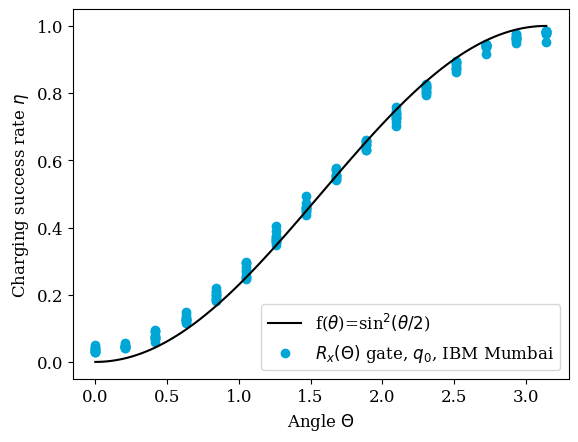

In [19]:
font = {'family':'serif','size':12}

# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in data:
    plt.scatter(theta,i,color=tud_color)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$R_x(\Theta)$ gate, $q_0$, IBM Mumbai"], prop=font, loc="lower right")
plt.show()

## Data Analysis

In [20]:
dataF=np.array(data)
data=dataF.transpose()

In [21]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)

Mean values: [0.03693359375, 0.0469109375, 0.07699609375000001, 0.1290125, 0.19834140625000002, 0.271171875, 0.3698015625, 0.459040625, 0.55731171875, 0.646334375, 0.73111640625, 0.8129515625, 0.88229375, 0.93876796875, 0.96428359375, 0.9786257812500001]


In [22]:
#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)

Standard Deviation: [0.0068283719295310664, 0.00481873860042426, 0.011075571731724295, 0.009460997625737929, 0.011917460094438708, 0.018531070496074123, 0.015579845770683396, 0.014676414034301772, 0.012494100878522447, 0.010533318138916392, 0.015163953201080858, 0.00984713657023261, 0.010774895205950673, 0.008291273451895155, 0.007625968536400084, 0.008930252367578008]


In [23]:
mean_std_dev=np.mean(std_dev)
print(mean_std_dev)

0.011034335539593237


In [24]:
#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)

Standard Error: [0.002159320800807694, 0.0015238189426312679, 0.0035024033060824145, 0.002991830143477713, 0.003768631782259167, 0.005860039024874056, 0.004926779822950091, 0.004641089623205417, 0.0039509816092041655, 0.0033309276638141673, 0.004795263044761678, 0.0031139379992673657, 0.003407321040043318, 0.002621930881127521, 0.002411542993980494, 0.002823993756165771]


In [25]:
mean_std_err=np.mean(std_err)
print(mean_std_err)

0.0034893632771657687


In [26]:
#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)

Maximum values: [0.05, 0.057, 0.095703125, 0.1495, 0.220703125, 0.2978515625, 0.404296875, 0.494140625, 0.578125, 0.66015625, 0.7578125, 0.828125, 0.8955078125, 0.947265625, 0.9755859375, 0.9853515625]
Minimum values: [0.0283203125, 0.0400390625, 0.05859375, 0.115234375, 0.1826171875, 0.2470703125, 0.3486328125, 0.4365234375, 0.5400390625, 0.6298828125, 0.703125, 0.7958984375, 0.862, 0.916, 0.9485, 0.95325]


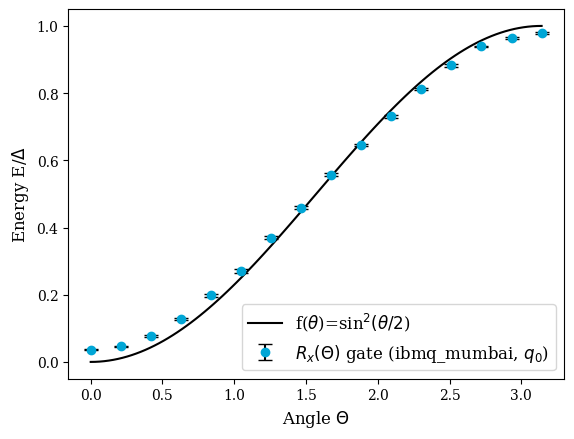

In [27]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_err, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$R_x(\Theta)$ gate (ibmq_mumbai, $q_0$)"], prop=font, loc="lower right")
plt.show()

In [28]:
max(mean_values)

0.9786257812500001

## Fit function

In [29]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [30]:
from scipy.optimize import curve_fit

guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

print(fit_a)
print(fit_b)

0.9673712188564456
0.043067031741342465


In [31]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.96737 with standard error of 0.00203.
The value of phi is 0.04307 with standard error of 0.01224.


In [32]:
fit_sin2 = sin2_func(xdata, fit_a, fit_b)

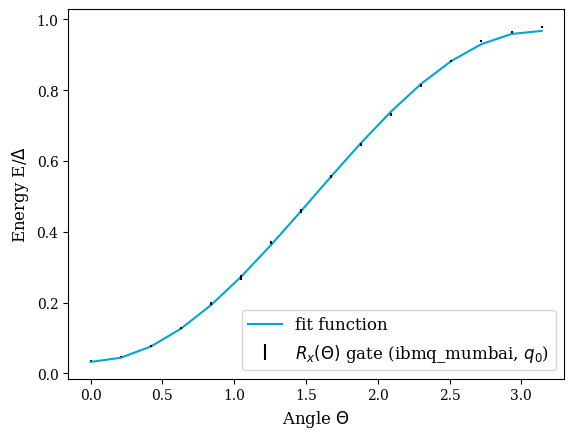

In [33]:
plt.plot(xdata, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["fit function", "$R_x(\Theta)$ gate (ibmq_mumbai, $q_0$)"], prop=font, loc="lower right")